# Interactivity with Jupyter and Matplotlib

What are Jupyter and Matplotlib?

### Project Jupyter
[Project Jupyter](https://jupyter.org) is a project and a community developing open-source software, open-standards, and services for interactive computing across several programming languages.

In this workshop, we will run the [Jupyter Notebook](https://docs.jupyter.org/en/latest/start/index.html) application to view and execute HyperSpy code in documents called "notebooks". The Jupyter server will run on your own computer, and we will interact with it via web browser. There is a newer Jupyter interface called [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/), which has some nice improvements compared to the Notebook, but does not work quite as well with HyperSpy's interactive plotting tools.

### Matplotlib
[Matplotlib](https://matplotlib.org) is a comprehensive python library for plotting and interactive visualizations of data.

## 1. Before We Get Started

Before learning about HyperSpy, we will start by learning how to use notebook documents interactively, including:
- How to use a Jupyter notebook document?
  - The difference between the Jupyter **application** and a notebook **document** 
  - Start/stop the JupyterLab **application**
  - Start/stop a **Jupyter kernel**
- How to visualise data interactively?
  - The use of different **matplotlib backends** for interactive visualization
  - Changing *matplotlib* backends

## 2. What is a Jupyter Notebook?

A Jupyter notebook document can contain text, interactive code, images, and interactive wdigets; together, the document represents an interactive computing environment that allows for extended prose and documentation.

The notebook is split into *cells* that contain content; these can be of different types, but the two main are:
- *Code* cells, which execute code and return the result
- *Markdown* cells, which can contain notes, comments, images, etc. For example, this current cell is of markdown type

Markdown is a simple way of generating formatted text from plain-text inputs. For a tutorial on Markdown, consult the `Help -> Markdown Reference` option in the menu bar of JupyterLab.

The following cell is of *code* type:

In [1]:
print('This is a code cell, which has an input and an output')

This is a code cell, which has an input and an output


To execute a code cell:
- Select the cell
- Press **Shift + Enter**

The notebook document does not actually evaluate and code. Instead, it sends the code to a *kernel*, which is a separate Python process, and waits for the response, printing it to "output" area of the cell. A kernel is started automatically when opening a notebook document. It can be stopped and restarted.

## 3. Plotting (Non-)Interactively

In [2]:
# Import matplotlib
import matplotlib.pyplot as plt

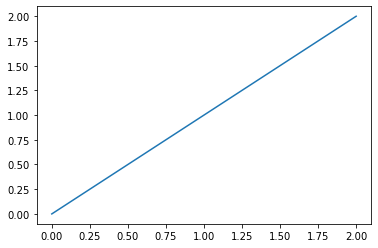

In [3]:
# Plot a series of numbers
plt.plot([0, 1, 2])

The plot above is not interactive, because by default, *matplotlib* uses a non-interactive backend. A backend controls the interface wrapped around the figure, and allows us to interact with the plots. To instruct *matplotlib* to use an interactive backend, we use the `%` character to send a "magic" command:

In [4]:
# Initialise the notebook backend
%matplotlib notebook

<IPython.core.display.Javascript object>


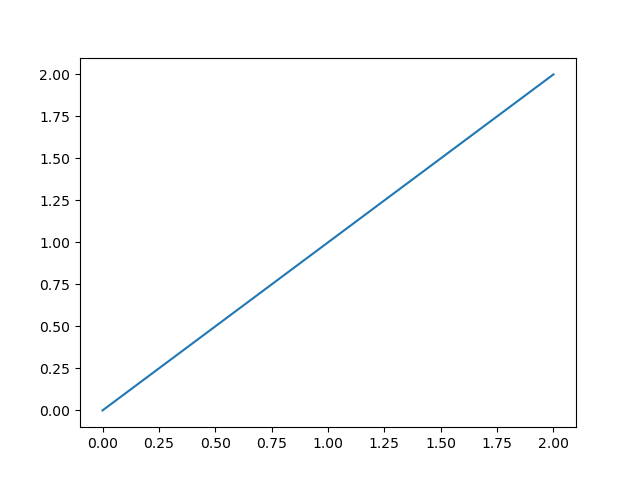

In [5]:
plt.plot([0, 1, 2])

This last figure is now interactive, because we have initialised the `wdiget` **matplotlib backend** using `%matplotlib widget`

### 3.1 What is a maplotlib backend?

Matplotlib can display data in many different environments and provide figures for different types of outputs: a notebook cell, a separate window, etc. The [matplotlib backend](https://matplotlib.org/stable/tutorials/introductory/usage.html#what-is-a-backend) refers to the part of matplotlib which generates a figure for a specific environment/output.

Matplotlib has many [plotting backends](https://matplotlib.org/stable/tutorials/introductory/usage.html#the-builtin-backends) and the most common are:
- `widget` (Jupyter Lab and Notebook only, can be run locally or remotely).
- `notebook` (Jupyter Notebook only, can be run locally or remotely)
- `qt` (opens plots in separate windows, can only be used when running locally)

To initialise a specific plotting backend, we usually use an IPython magic command:

```python
%matplotlib name_of_backend
```

The `widget` backend will display matplotlib figures as notebook outputs and is **interactive**. It works in both the JupyterLab and classic "notebook" interface.

**NOTE:** Only one interactive backend can be initialised for a given running kernel. To switch interactive backends, it is necessary to restart the kernel.

### 3.2 Which `matplotlib` backend should I use?

In this workshop, we will primarily use the `widget` backend, because it works completely within the web browser. However, this backend has some limitations, and is sometimes not appropriate for fast interactive plotting.

An alternative is to use the `qt` backend, which requires that you are running Jupyter locally (so will not work if you are using a cloud computing environment).

In [1]:
# If running locally, try to change the plotting backend to `qt`
%matplotlib qt

At this point, this is very likely, that you get an error message. If you are running locally, the error message should tell you that that you can't change backend, therefore try to restart the kernel from the menu or the top bar. You will need to re-import matplotlib as well.

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.plot([0, 1, 2])

If you have restarted the kernel, ran the cell above just after initialising the `qt` backend, this is very likely you get a error message! This is normal, restarting a kernel means you start from scratch: variables will need to created again and libraries imported again for the current kernel.

## 4. Working/Navigating in Jupyter

JupyterLab and the Notebook interface have two modes, which (among other things) determine how a cell is displayed:

- *Edit* mode, where you can type into cells and modify their contents
    - Text is shown in `monospace` font, and text cursor will be shown
- *Command* mode, where you can execute commands in the Jupyter interface
    - No cursor is shown, and the current cell is highlighted on the left side

### Using Jupyter's modes 

When in command mode, press `Enter` to enter edit mode; conversely, press `Esc` to exit edit mode back into command mode

When in edit mode, the cell acts much like any other text-editing field, while command mode has a number of keyboard shortcuts that will perform common tasks:

- `Up arrow`: Select cell above; `Down arrow`: Select cell below
- `b`: Insert new cell below current one
- `a`: Insert new cell above current one
- `d d`: Delete the current cell
- `m`: Change cell type to *markdown*
- `y`: Change cell type to *code*


At any time, the keys `Shift-Enter` can be used to execute a *code* cell, or render a *markdown* cell into HTML, and Jupyter will select the next cell or insert a new one as needed. `Ctrl-Enter` will do the same thing, but leave the current cell selected. 

Alternatively, all of these commands can be selected from the menu bar, and common tasks are shown as shortcut buttons in the currently active cell

### Order of operation and kernel state 

When code cells are run, any variables created are stored in the background *kernel* process. It is up to the user to ensure that cells are executed in an order that makes sense given the kernel's state. For example, the following two cells save a number into a variable `a`, and then print the result of that value after some simple arithmetic.

If the second cell is run before the first one, you will receive an error, since the kerenel does not know what the variable `a` represents until it is defined as `a = 5`:

In [8]:
a = 5

In [9]:
print(a * 3)

15


Remember, each time you shut down or restart the kernel, all your variables will be cleared and you will have to re-run all the cells in order to reach the same state.

As a helpful tool, Jupyter will add numbers to the left of code cells (both inputs and outputs) after they are evaluated that show you the order of operations, such as `[1]:` and `[2]:`. If a code cell has not yet been evaluated, it will be empty: `[ ]:`

## 5. Saving your work 

The Jupyter interface will automatically save your work, including any code outputs so they are visible when the notebook is later re-opened via the `.ipynb` file. You can save at any time also by pressing `Ctrl-S` or clicking the save icon.

Under the `File` menu, there are a number of exporting options available if you would like to share your results, although the `.ipynb` file contains everything you need. Services such as Github will render `.ipynb` files for you so you can view (but not run) them just by browsing to them.

This link will demonstrate viewing the current notebook within the HyperSpy tutorial repository used for this course: https://github.com/usnistgov/hyperspy_tutorial/blob/2022-07-31_MandM_short_course/02%20HyperSpy%20basics/jupyter_matplotlib.ipynb